In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Import Capital Bike Share DataFrames
df_st = pd.read_csv('station_info.csv')
df_wk = pd.read_csv('last_week.csv')

In [41]:
# Checking the no. of rows and columns in the given DataFrames
print(df_st.shape)
print(df_wk.shape)

(647, 3)
(57934, 14)


In [42]:
# Checking empty cells in the columns for DataFrames
print(df_st.isnull().sum())
print(df_wk.isnull().sum())

Unnamed: 0    0
Name          0
Capacity      0
dtype: int64
ride_id                  0
rideable_type            0
started_at               0
ended_at                 0
start_station_name    4991
start_station_id      4991
end_station_name      5422
end_station_id        5422
start_lat                0
start_lng                0
end_lat                 86
end_lng                 86
member_casual            0
day                      0
dtype: int64


In [43]:
# Droping empty rows from the DataFrame
df_wk= df_wk.dropna()

In [44]:
# Cross checking for the empty values 
df_wk.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
day                   0
dtype: int64

In [45]:
# Top 5 (by default) for DataFrame with capacity information
df_st.head()

,Unnamed: 0,Name,Capacity
0,0,Eads St & 15th St S,15
1,1,18th St & S Eads St,11
2,2,Crystal Dr & 20th St S,17
3,3,Crystal Dr & 15th St S,16
4,4,Aurora Hills Cmty Ctr / 18th St & S Hayes St,12


In [46]:
# Top 5 (by default) rows for DataFrame with total rides information
df_wk.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day
0,B3FA23181ADC06FE,docked_bike,2021-06-25 00:51:53,2021-06-25 01:51:40,Georgia Ave & Spring St,32035.0,New Hampshire & Kirklynn Ave,32061.0,38.999388,-77.031555,38.988101,-76.988422,casual,2021-06-25
1,6A153F2AD6700EE1,classic_bike,2021-06-22 06:28:23,2021-06-22 06:33:19,Merrifield Cinema & Merrifield Town Center,32235.0,Merrilee Dr & Lauren Elizabeth Lane,32234.0,38.870093,-77.229970,38.879355,-77.230681,casual,2021-06-22
2,7265E4C759F1EDC0,classic_bike,2021-06-22 22:27:28,2021-06-22 22:30:39,Columbia & Ontario Rd NW,31296.0,15th & Harvard St NW,31103.0,38.924088,-77.040787,38.926124,-77.035421,member,2021-06-22
3,18FB278BE5F2B0C7,docked_bike,2021-06-26 20:49:57,2021-06-26 22:44:29,1st & H St NW,31638.0,1st & H St NW,31638.0,38.900358,-77.012108,38.900358,-77.012108,casual,2021-06-26
4,294E78FE02E1C65F,classic_bike,2021-06-22 20:35:41,2021-06-22 20:45:27,5th & K St NW,31600.0,17th St & Massachusetts Ave NW,31267.0,38.903040,-77.019027,38.908142,-77.038359,member,2021-06-22


<AxesSubplot:>

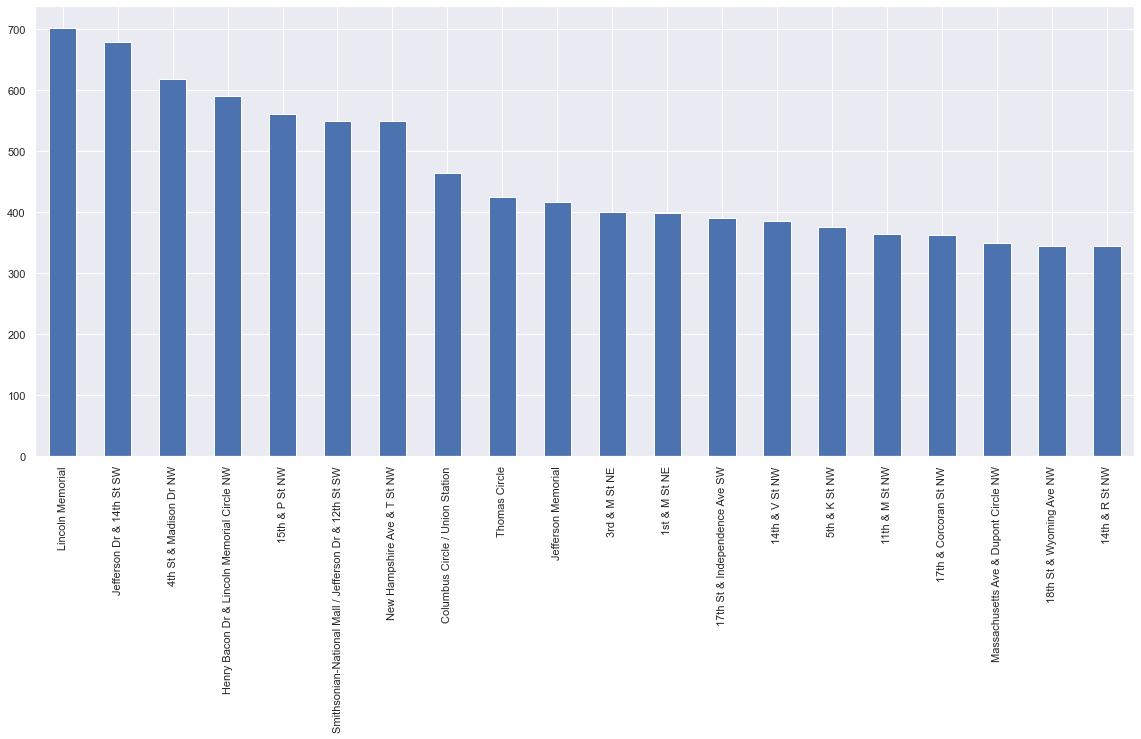

In [47]:
# Plotting top stations with Higher demand
df_wk['start_station_name'].value_counts()[:20].plot(kind='bar')

In [48]:
# Checking the no. of Bikes demand per week for the busiest station
df_wk[df_wk['start_station_name']=='Lincoln Memorial'].count()

ride_id               703
rideable_type         703
started_at            703
ended_at              703
start_station_name    703
start_station_id      703
end_station_name      703
end_station_id        703
start_lat             703
start_lng             703
end_lat               703
end_lng               703
member_casual         703
day                   703
dtype: int64

In [49]:
# Droping cloumn which is not required for the analysis
df_st= df_st.drop(['Unnamed: 0'], axis=1)
df_st

,Name,Capacity
0,Eads St & 15th St S,15
1,18th St & S Eads St,11
2,Crystal Dr & 20th St S,17
3,Crystal Dr & 15th St S,16
4,Aurora Hills Cmty Ctr / 18th St & S Hayes St,12
...,...,...
642,Green Range Dr and Glade Dr,12
643,South Gate Community Center,12
644,Lake Newport Rd and Autumn Ridge Cir,12
645,Ridge Heights and Owl Cove Ln,12


In [50]:
# Checking the capacity of the Station with highest demand
df_st[(df_st['Name']=='Lincoln Memorial')]

,Name,Capacity
195,Lincoln Memorial,25


In [51]:
# Checking Data Type for the given DataFrames
print(df_st.dtypes)
print(df_wk.dtypes)

Name        object
Capacity     int64
dtype: object
ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id      float64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
day                    object
dtype: object


In [52]:
# Converting 'day' cloumn data type from 'Object' to 'int'
df_wk['day'].str.replace("-","").astype(int)

0        20210625
1        20210622
2        20210622
3        20210626
4        20210622
           ...   
57929    20210623
57930    20210625
57931    20210625
57932    20210625
57933    20210621
Name: day, Length: 50625, dtype: int64

In [53]:
# Get weekday, month and year from 'day' column
df_wk.day = pd.to_datetime(df_wk.day)
df_wk.loc[:,'DAY'] = df_wk.day.dt.day
df_wk.loc[:,'weekday'] = df_wk.day.dt.day_name()
df_wk.loc[:,'month'] = df_wk.day.dt.month_name()
df_wk.loc[:,'yr'] = df_wk.day.dt.year;

In [54]:
df_wk.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day,DAY,weekday,month,yr
0,B3FA23181ADC06FE,docked_bike,2021-06-25 00:51:53,2021-06-25 01:51:40,Georgia Ave & Spring St,32035.0,New Hampshire & Kirklynn Ave,32061.0,38.999388,-77.031555,38.988101,-76.988422,casual,2021-06-25,25,Friday,June,2021
1,6A153F2AD6700EE1,classic_bike,2021-06-22 06:28:23,2021-06-22 06:33:19,Merrifield Cinema & Merrifield Town Center,32235.0,Merrilee Dr & Lauren Elizabeth Lane,32234.0,38.870093,-77.229970,38.879355,-77.230681,casual,2021-06-22,22,Tuesday,June,2021
2,7265E4C759F1EDC0,classic_bike,2021-06-22 22:27:28,2021-06-22 22:30:39,Columbia & Ontario Rd NW,31296.0,15th & Harvard St NW,31103.0,38.924088,-77.040787,38.926124,-77.035421,member,2021-06-22,22,Tuesday,June,2021
3,18FB278BE5F2B0C7,docked_bike,2021-06-26 20:49:57,2021-06-26 22:44:29,1st & H St NW,31638.0,1st & H St NW,31638.0,38.900358,-77.012108,38.900358,-77.012108,casual,2021-06-26,26,Saturday,June,2021
4,294E78FE02E1C65F,classic_bike,2021-06-22 20:35:41,2021-06-22 20:45:27,5th & K St NW,31600.0,17th St & Massachusetts Ave NW,31267.0,38.903040,-77.019027,38.908142,-77.038359,member,2021-06-22,22,Tuesday,June,2021


In [55]:
# Showing the dataframe for station and date
df_wk[(df_wk['start_station_name']=='Lincoln Memorial') & (df_wk['day']=='2021-06-25')]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day,DAY,weekday,month,yr
3208,B7D1BDABC4015EA6,docked_bike,2021-06-25 15:10:47,2021-06-25 15:34:41,Lincoln Memorial,31258.0,New York Ave & 15th St NW,31222.0,38.888255,-77.049437,38.899032,-77.033354,casual,2021-06-25,25,Friday,June,2021
6323,6541996C84771BD8,docked_bike,2021-06-25 19:32:31,2021-06-25 19:46:45,Lincoln Memorial,31258.0,Jefferson Memorial,31249.0,38.888255,-77.049437,38.879819,-77.037413,casual,2021-06-25,25,Friday,June,2021
8108,12B2F63AC433872D,docked_bike,2021-06-25 20:52:36,2021-06-25 21:03:29,Lincoln Memorial,31258.0,USDA / 12th & C St SW,31217.0,38.888255,-77.049437,38.886277,-77.028242,casual,2021-06-25,25,Friday,June,2021
8512,7DDADAECDB3F39C6,classic_bike,2021-06-25 23:14:45,2021-06-26 00:00:12,Lincoln Memorial,31258.0,Smithsonian-National Mall / Jefferson Dr & 12t...,31248.0,38.888255,-77.049436,38.888774,-77.028694,casual,2021-06-25,25,Friday,June,2021
10398,938C7ABA949549F9,electric_bike,2021-06-25 10:05:34,2021-06-25 10:28:44,Lincoln Memorial,31258.0,Columbus Circle / Union Station,31623.0,38.888219,-77.049562,38.897302,-77.004923,casual,2021-06-25,25,Friday,June,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57388,52EF09462B642847,docked_bike,2021-06-25 15:44:12,2021-06-25 16:30:44,Lincoln Memorial,31258.0,17th St & Independence Ave SW,31290.0,38.888255,-77.049437,38.888097,-77.038325,casual,2021-06-25,25,Friday,June,2021
57395,D5F89BF45A5769A5,docked_bike,2021-06-25 11:50:33,2021-06-25 12:18:08,Lincoln Memorial,31258.0,17th St & Independence Ave SW,31290.0,38.888255,-77.049437,38.888097,-77.038325,casual,2021-06-25,25,Friday,June,2021
57396,3593E5400291E3A5,docked_bike,2021-06-25 14:26:03,2021-06-25 14:58:25,Lincoln Memorial,31258.0,17th St & Independence Ave SW,31290.0,38.888255,-77.049437,38.888097,-77.038325,casual,2021-06-25,25,Friday,June,2021
57429,2F39BD2771A24DE7,docked_bike,2021-06-25 14:25:03,2021-06-25 14:54:40,Lincoln Memorial,31258.0,17th St & Independence Ave SW,31290.0,38.888255,-77.049437,38.888097,-77.038325,casual,2021-06-25,25,Friday,June,2021


In [56]:
# Counting Bike rides using 'count()' function, for the busiest station for only one day
df_wk[(df_wk['start_station_name']=='Lincoln Memorial') & (df_wk['day']=='2021-06-25')].count()['ride_id']

140

In [57]:
# just checking
#count_wk_= pd.DataFrame(df_wk.groupby(['end_station_name'], sort=True).count()['ride_id'])
#count_wk_

In [58]:
# Creating DataFrame based on grouping by station starting names and than make the total Counting
count_wk_id= pd.DataFrame(df_wk.groupby(['start_station_name']).count()['ride_id'])
count_wk_id

,ride_id
start_station_name,
10th & E St NW,174
10th & Florida Ave NW,239
10th & G St NW,111
10th & K St NW,252
10th & Monroe St NE,49
...,...
Wisconsin Ave & O St NW,156
Woodglen Dr & Executive Blvd,15
Woodley Park Metro / Calvert St & Connecticut Ave NW,196


In [59]:
# Combining two DataFrames using 'merge' function
df_merge = pd.merge(count_wk_id, df_st, how='left', left_on='start_station_name', right_on='Name')
df_merge

,ride_id,Name,Capacity
0,174,10th & E St NW,15.0
1,239,10th & Florida Ave NW,19.0
2,111,10th & G St NW,23.0
3,252,10th & K St NW,23.0
4,49,10th & Monroe St NE,15.0
...,...,...,...
606,156,Wisconsin Ave & O St NW,19.0
607,15,Woodglen Dr & Executive Blvd,16.0
608,196,Woodley Park Metro / Calvert St & Connecticut ...,23.0
609,44,Woodmont Ave & Strathmore St,11.0


In [60]:
# Checking and deleting empty rows
df_merge.isnull().sum()
df_merge= df_merge.dropna()
df_merge

,ride_id,Name,Capacity
0,174,10th & E St NW,15.0
1,239,10th & Florida Ave NW,19.0
2,111,10th & G St NW,23.0
3,252,10th & K St NW,23.0
4,49,10th & Monroe St NE,15.0
...,...,...,...
606,156,Wisconsin Ave & O St NW,19.0
607,15,Woodglen Dr & Executive Blvd,16.0
608,196,Woodley Park Metro / Calvert St & Connecticut ...,23.0
609,44,Woodmont Ave & Strathmore St,11.0


In [61]:
# Average daily demand column ('Avg_Day') has been added to the merged DataFrame
# // is used for integer division
df_merge['Avg_Day'] = df_merge['ride_id']//7;
df_merge

<ipython-input-61-243b25a1eeae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge['Avg_Day'] = df_merge['ride_id']//7;


,ride_id,Name,Capacity,Avg_Day
0,174,10th & E St NW,15.0,24
1,239,10th & Florida Ave NW,19.0,34
2,111,10th & G St NW,23.0,15
3,252,10th & K St NW,23.0,36
4,49,10th & Monroe St NE,15.0,7
...,...,...,...,...
606,156,Wisconsin Ave & O St NW,19.0,22
607,15,Woodglen Dr & Executive Blvd,16.0,2
608,196,Woodley Park Metro / Calvert St & Connecticut ...,23.0,28
609,44,Woodmont Ave & Strathmore St,11.0,6


In [62]:
# Sorting values based on Rider ID ('ride_id') column
df_merge= df_merge.sort_values(by=['ride_id'], ascending=False)
df_merge

,ride_id,Name,Capacity,Avg_Day
382,703,Lincoln Memorial,25.0,100
346,679,Jefferson Dr & 14th St SW,23.0,97
156,619,4th St & Madison Dr NW,31.0,88
341,590,Henry Bacon Dr & Lincoln Memorial Circle NW,19.0,84
55,562,15th & P St NW,19.0,80
...,...,...,...,...
190,1,Anacostia Library,11.0,0
246,1,Columbus Ave & Gramercy Blvd,11.0,0
351,1,Jones Branch Drive & Scotts Crossing Rd,11.0,0
362,1,Key West Ave & Siesta Key Way,15.0,0


In [ ]:
# Writing output csv file from the dataframe
# df_merge.to_csv (r'capacity_vs_demand.csv', index = False, header=True)

In [ ]:
# Getting values based on index
# df_merge.Name.value_counts().iloc[440:470].index

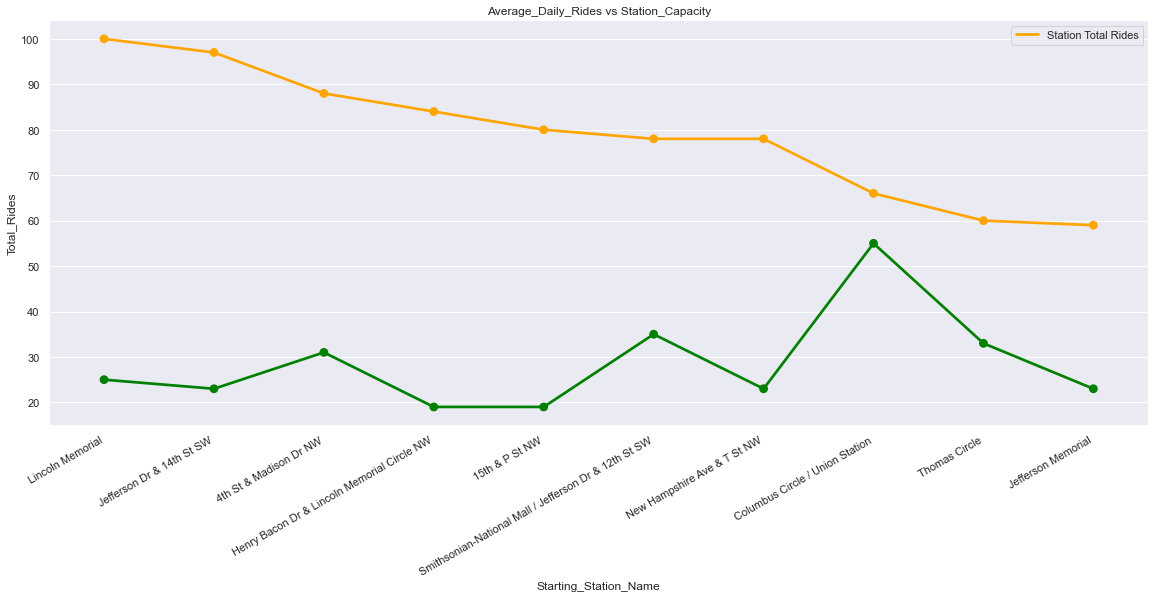

In [71]:
# Plotting the Range of busiest Station Names and Total number of rides

fig, ax = plt.subplots(1,1)


sns.pointplot(data=df_merge.head(10), x='Name', y='Avg_Day', ax=ax, color='orange')

sns.pointplot(data=df_merge.head(10), x='Name', y='Capacity', ax=ax, color='green')

plt.title('Average_Daily_Rides vs Station_Capacity')
plt.ylabel('Total_Rides')
plt.xlabel('Starting_Station_Name')

ax.legend(handles=ax.lines[::len(df_merge.head(40))+1], labels=["Station Total Rides","Station Capacity"])

plt.gcf().autofmt_xdate()

plt.show()

In [88]:
# Stations with less Capacity
a= df_merge[df_merge['Avg_Day'] > df_merge['Capacity']]
a.head(10)

,ride_id,Name,Capacity,Avg_Day
382,703,Lincoln Memorial,25.0,100
346,679,Jefferson Dr & 14th St SW,23.0,97
156,619,4th St & Madison Dr NW,31.0,88
341,590,Henry Bacon Dr & Lincoln Memorial Circle NW,19.0,84
55,562,15th & P St NW,19.0,80
527,550,Smithsonian-National Mall / Jefferson Dr & 12t...,35.0,78
443,549,New Hampshire Ave & T St NW,23.0,78
247,464,Columbus Circle / Union Station,55.0,66
547,425,Thomas Circle,33.0,60
347,417,Jefferson Memorial,23.0,59


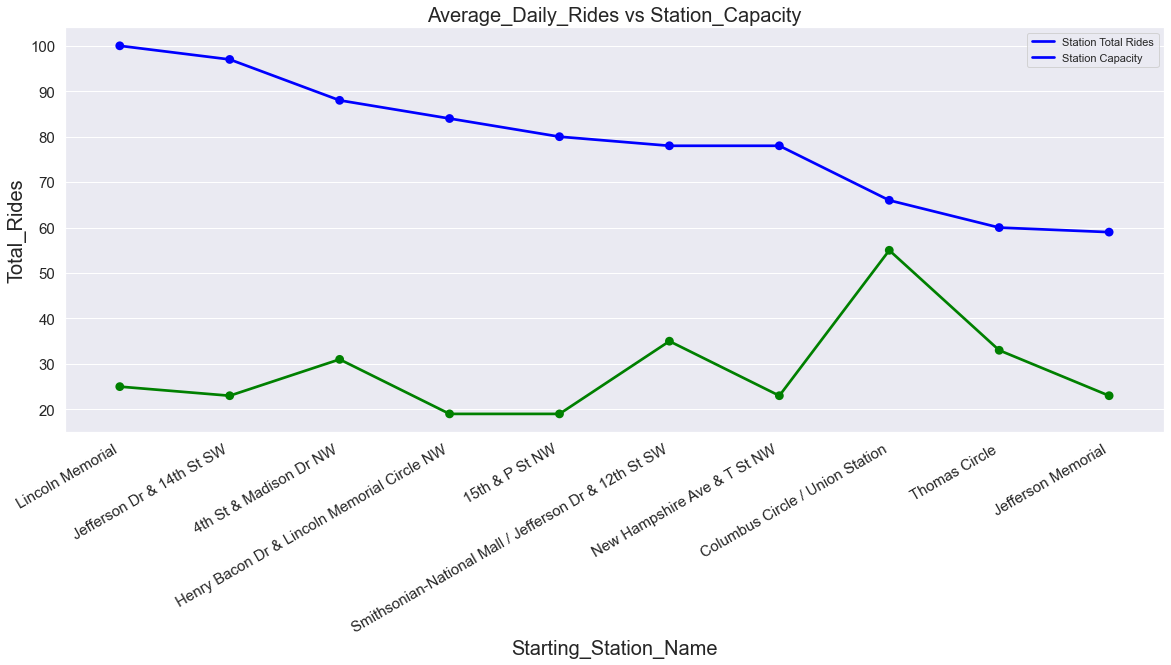

In [89]:

sns.pointplot(x='Name',y='Avg_Day',data=a.head(10),color='blue')
sns.pointplot(x='Name',y='Capacity',data=a.head(10),color='green')
#sns.pointplot(x=x_col,y=y_col,data=df_3,color='red')
plt.legend(labels=['Station Total Rides', 'Station Capacity'])

plt.title('Average_Daily_Rides vs Station_Capacity', fontsize=20)
plt.ylabel('Total_Rides', fontsize=20)
plt.xlabel('Starting_Station_Name', fontsize=20)
plt.tick_params(labelsize=15)

plt.gcf().autofmt_xdate()

In [86]:
b= df_merge[df_merge['Avg_Day'] < df_merge['Capacity']].sort_values(by=['Capacity'], ascending=False)
b.head(10)

,ride_id,Name,Capacity,Avg_Day
147,206,4th & C St SW,39.0,29
557,107,USDA / 12th & C St SW,39.0,15
405,184,Metro Center / 12th & G St NW,39.0,26
93,100,1st & N St SE,39.0,14
67,146,17th & K St NW / Farragut Square,35.0,20
105,119,21st & I St NW,35.0,17
85,151,19th St & Constitution Ave NW,35.0,21
445,117,New Jersey Ave & F St NW,33.0,16
22,125,13th & D St NE,31.0,17
574,193,Washington & Independence Ave SW/HHS,31.0,27


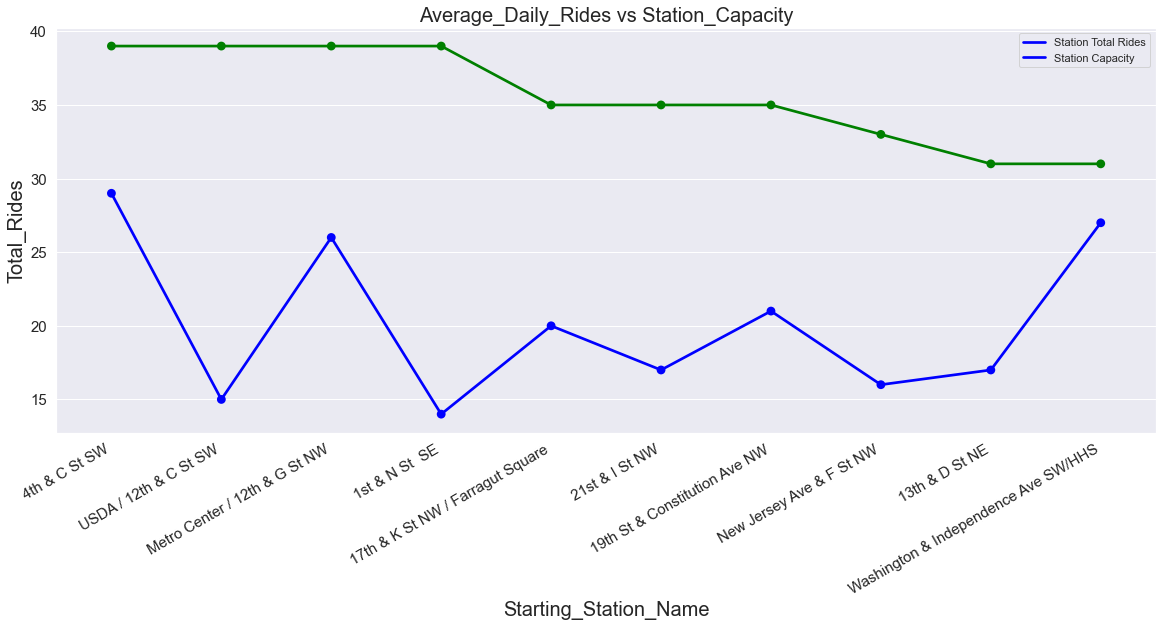

In [87]:
sns.pointplot(x='Name',y='Avg_Day',data=b.head(10),color='blue')
sns.pointplot(x='Name',y='Capacity',data=b.head(10),color='green')
#sns.pointplot(x=x_col,y=y_col,data=df_3,color='red')
plt.legend(labels=['Station Total Rides', 'Station Capacity'])

plt.title('Average_Daily_Rides vs Station_Capacity', fontsize=20)
plt.ylabel('Total_Rides', fontsize=20)
plt.xlabel('Starting_Station_Name', fontsize=20)
plt.tick_params(labelsize=15)

plt.gcf().autofmt_xdate()

#### We can futher split dataframe for Members and Casual users 

In [ ]:
# Sorting stations for members
df_mem = df_wk[df_wk['member_casual']=='member']

<AxesSubplot:>

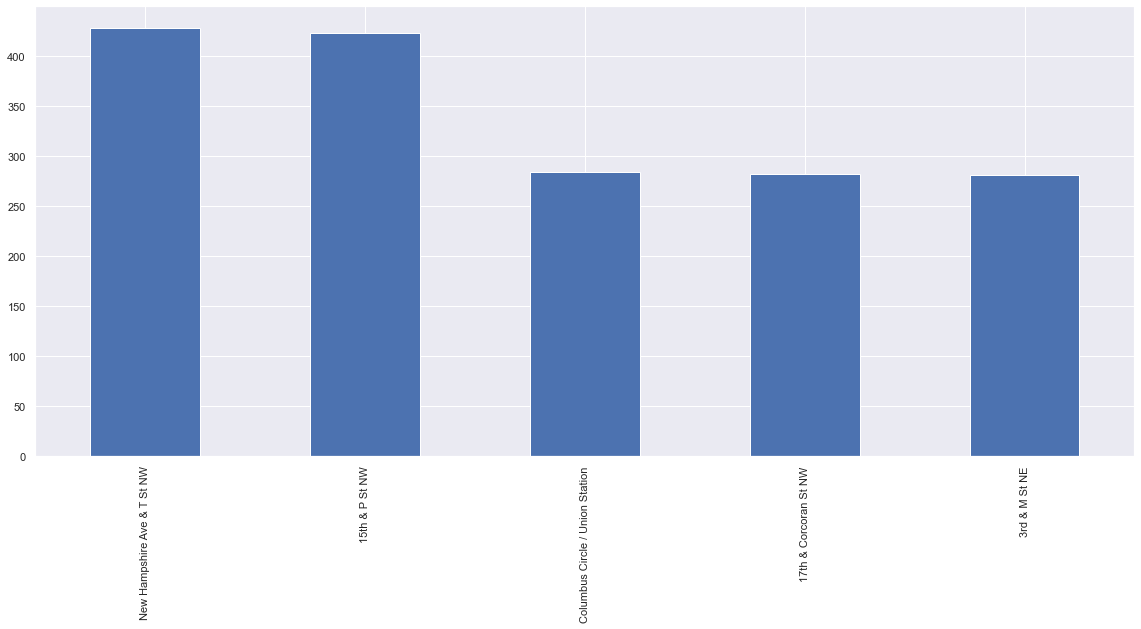

In [ ]:
# Plotting top stations for members with Higher demand
df_mem['start_station_name'].value_counts()[:5].plot(kind='bar')

In [ ]:
# Sorting stations for casual users
df_cas = df_wk[df_wk['member_casual']=='casual']

<AxesSubplot:>

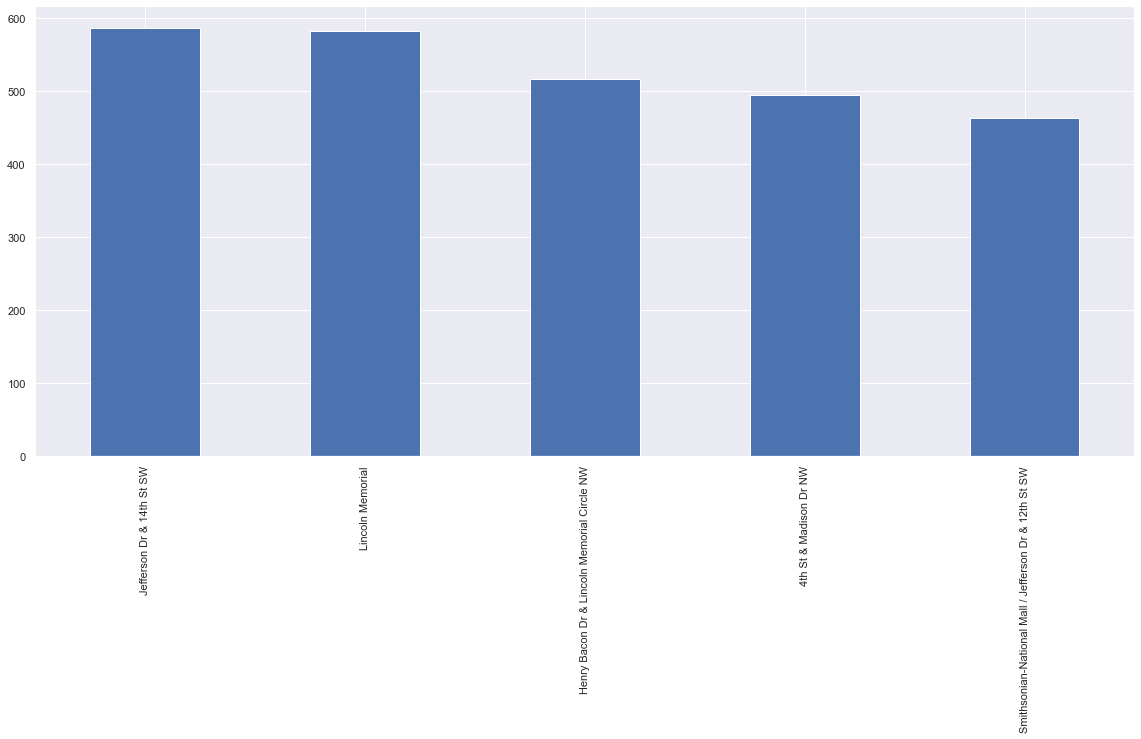

In [ ]:
# Plotting top stations for casual users with Higher demand
df_cas['start_station_name'].value_counts()[:5].plot(kind='bar')